In [12]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

In [13]:
dataset_folder = './datasets/train_zip/train'

In [14]:
data = {
    'filename': [],
    'width': [],
    'height': [],
    'class': [],
    'xmin': [],
    'ymin': [],
    'xmax': [],
    'ymax': []
}

In [15]:
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    filename = root.find('filename').text
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)

    for obj in root.iter('object'):
        obj_class = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        data['filename'].append(filename)
        data['width'].append(width)
        data['height'].append(height)
        data['class'].append(obj_class)
        data['xmin'].append(xmin)
        data['ymin'].append(ymin)
        data['xmax'].append(xmax)
        data['ymax'].append(ymax)

In [16]:
for file in os.listdir(dataset_folder):
    if file.endswith(".xml"):
        parse_xml(os.path.join(dataset_folder, file))

In [17]:
df = pd.DataFrame(data)
df['height']

0      300
1      290
2      500
3      250
4      250
      ... 
460    708
461      0
462    227
463    227
464    227
Name: height, Length: 465, dtype: int64

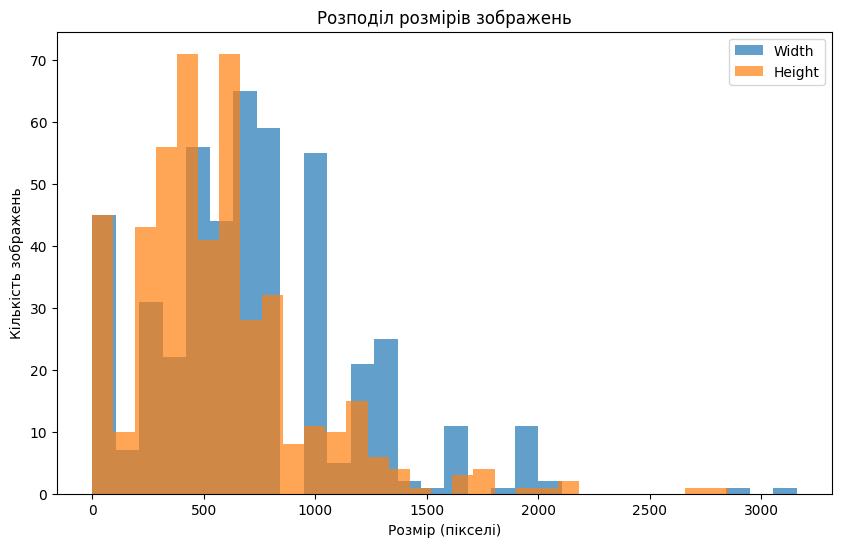

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['width'], bins=30, alpha=0.7, label='Width')
plt.hist(df['height'], bins=30, alpha=0.7, label='Height')
plt.xlabel('Розмір (пікселі)')
plt.ylabel('Кількість зображень')
plt.title('Розподіл розмірів зображень')
plt.legend()
plt.show()

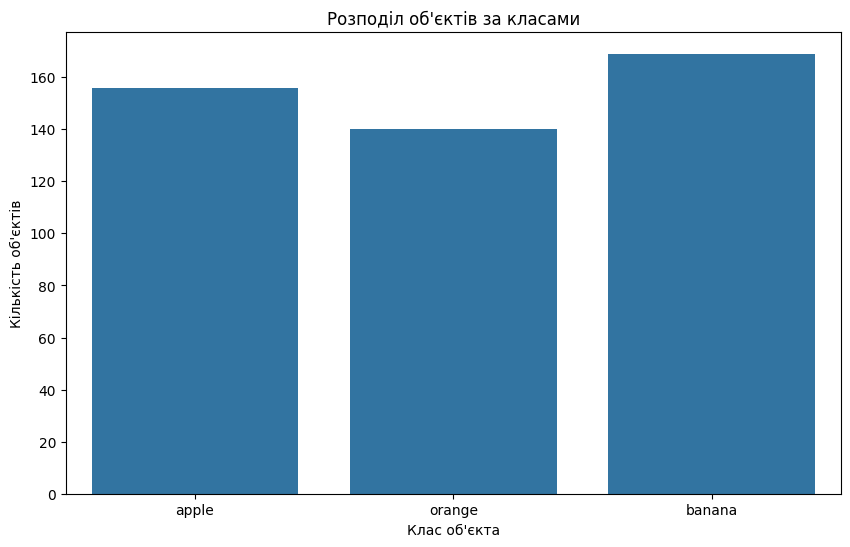

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Розподіл об\'єктів за класами')
plt.xlabel('Клас об\'єкта')
plt.ylabel('Кількість об\'єктів')
plt.show()

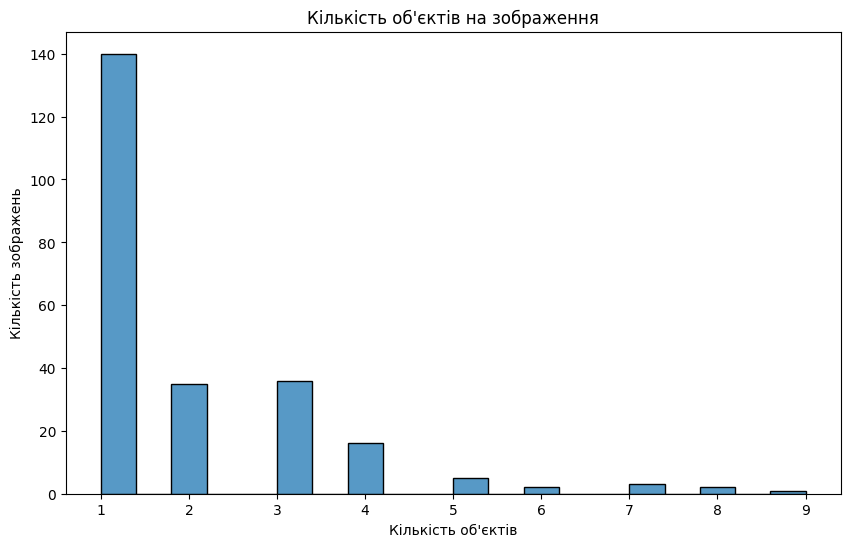

In [45]:
objects_per_image = df.groupby('filename')['class'].count().reset_index(name='object_count')

plt.figure(figsize=(10, 6))
sns.histplot(objects_per_image['object_count'], bins=20, kde=False)
plt.title('Кількість об\'єктів на зображення')
plt.xlabel('Кількість об\'єктів')
plt.ylabel('Кількість зображень')
plt.show()

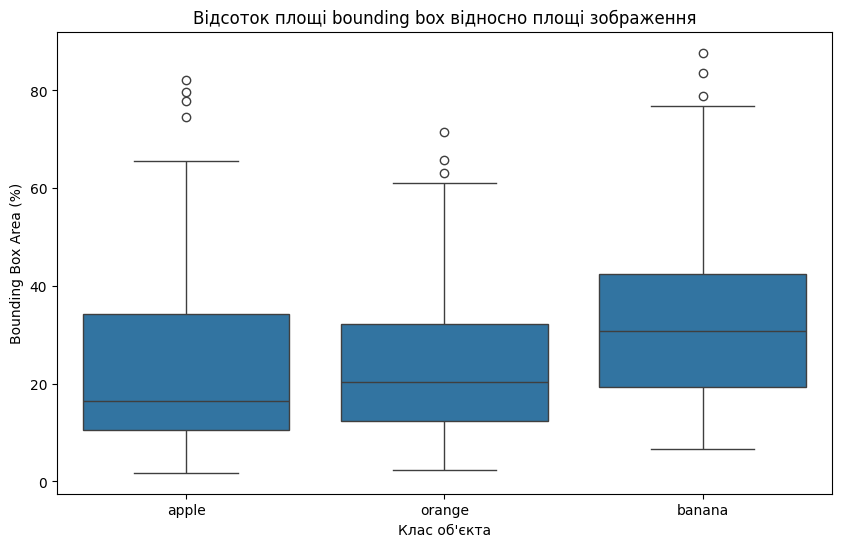

In [46]:
df['image_area'] = df['width'] * df['height']
df['bbox_area'] = (df['xmax'] - df['xmin']) * (df['ymax'] - df['ymin'])
df['bbox_percentage'] = (df['bbox_area'] / df['image_area']) * 100

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='bbox_percentage', data=df)
plt.title('Відсоток площі bounding box відносно площі зображення')
plt.xlabel('Клас об\'єкта')
plt.ylabel('Bounding Box Area (%)')
plt.show()

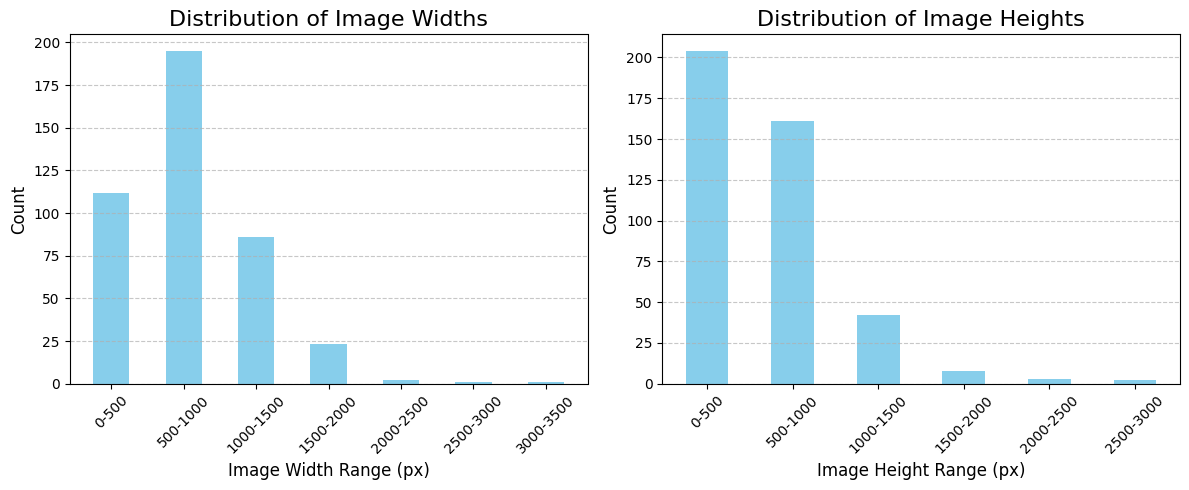

In [47]:
def plot_distribution(ax, data, title, xlabel):
    max_value = data.max()
    bins = range(0, max_value + 500, 500)

    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

    data_bin = pd.cut(data, bins=bins)
    counts = data_bin.value_counts().sort_index().reset_index()
    counts.columns = ['bin', 'count']

    ax.bar(labels, counts['count'], color='skyblue', width=0.5)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_distribution(axs[0], df['width'], 'Distribution of Image Widths', 'Image Width Range (px)')
plot_distribution(axs[1], df['height'], 'Distribution of Image Heights', 'Image Height Range (px)')

plt.tight_layout()
plt.show()

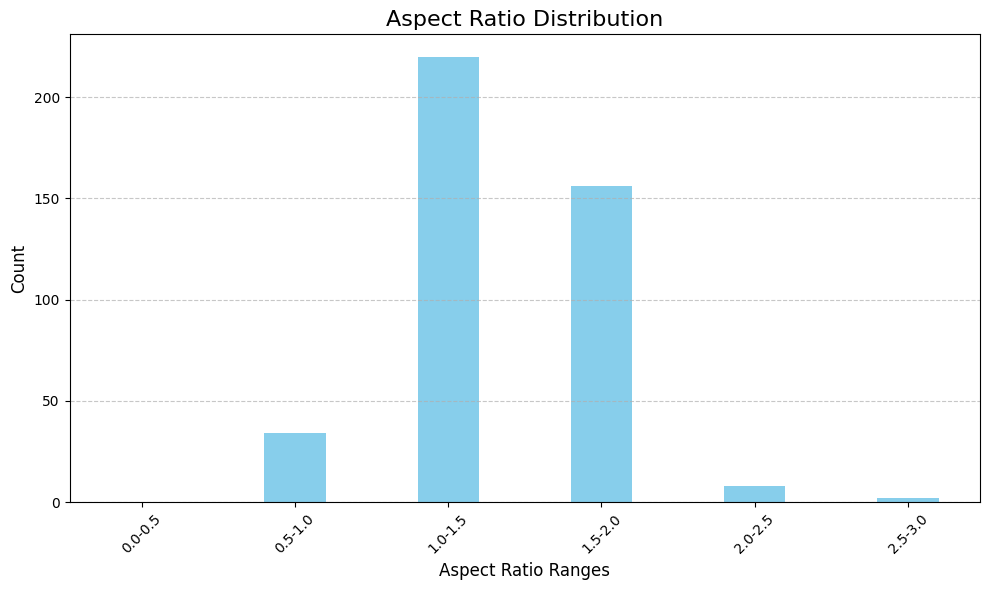

In [48]:
aspect_ratios = df['width'] / df['height']
max_aspect_ratio = aspect_ratios.max()

aspect_ratio_bins = np.arange(0, max_aspect_ratio + 0.5, 0.5)
aspect_ratio_labels = [f"{aspect_ratio_bins[i]}-{aspect_ratio_bins[i+1]}" for i in range(len(aspect_ratio_bins) - 1)]
aspect_ratio_counts, _ = np.histogram(aspect_ratios, aspect_ratio_bins)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(aspect_ratio_labels, aspect_ratio_counts, width=0.4, color='skyblue')
ax.set_xlabel('Aspect Ratio Ranges', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Aspect Ratio Distribution', fontsize=16)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


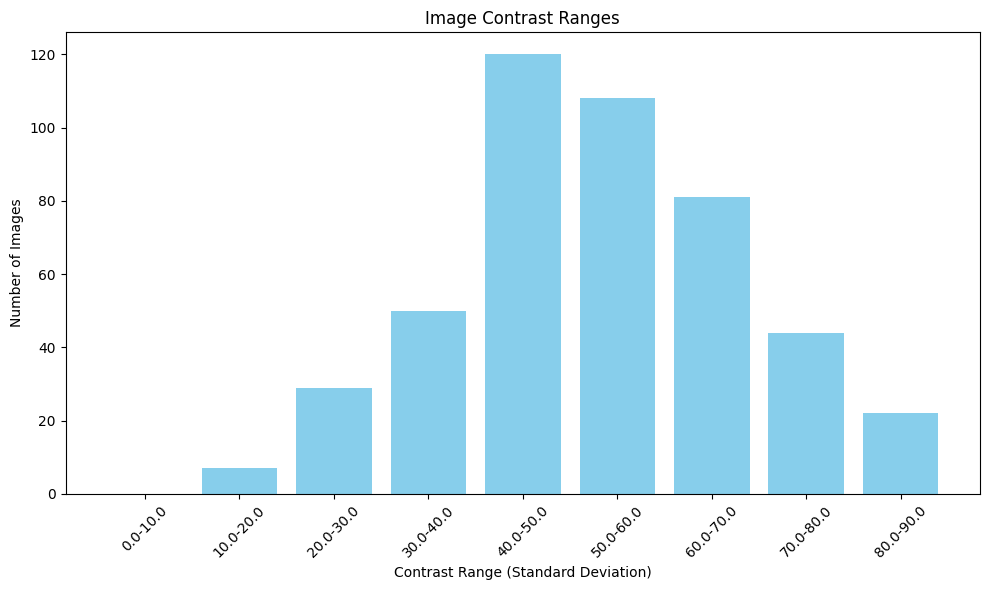

banana_50.jpg
banana_50.jpg
banana_50.jpg
banana_50.jpg
banana_44.jpg
banana_45.jpg
orange_2.jpg
orange_2.jpg
banana_42.jpg
banana_32.jpg
banana_32.jpg
banana_32.jpg
banana_32.jpg
banana_9.jpg
banana_31.jpg
banana_12.jpg
banana_12.jpg
banana_12.jpg
banana_12.jpg
banana_2.jpg
banana_11.jpg
banana_38.jpg
banana_1.jpg
banana_28.jpg
banana_29.jpg
banana_6.jpg
orange_53.jpg
banana_17.jpg
banana_17.jpg
banana_17.jpg
banana_17.jpg
banana_71.jpg
banana_64.jpg
banana_70.jpg
banana_62.jpg
banana_75.jpg


In [49]:
import cv2

def calculate_contrast(image_path):
    full_path = f"{dataset_folder}/{image_path}"
    image = cv2.imread(full_path)
    if image is None: 
        return None
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contrast = gray_image.std()  
    return contrast

df['contrast'] = df['filename'].apply(calculate_contrast)
df = df.dropna(subset=['contrast'])

max_contrast = df['contrast'].max()
contrast_bins = np.arange(0, max_contrast + 0.5, 10)
contrast_labels = [f"{contrast_bins[i]}-{contrast_bins[i+1]}" for i in range(len(contrast_bins) - 1)]

df['contrast_range'] = pd.cut(df['contrast'], bins=contrast_bins, labels=contrast_labels, right=False)
contrast_counts = df['contrast_range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(contrast_counts.index, contrast_counts.values, color='skyblue')
plt.title('Image Contrast Ranges')
plt.xlabel('Contrast Range (Standard Deviation)')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


low_contrast_images = df[df['contrast'] < 30]['filename']

for image_path in low_contrast_images:
    print(image_path)

In [50]:
'''
Висновки: 
1. В датасеті є 90 картинок з невизначеними значеннями width та height. 
Під час препроцесінгу потрібно ухвалити рішення щодо їх включення до датасету
2. Картинки с шириною 2000+ пікселів та висотою 1500+ пікселів - потенційні аутлаєри.
3. Картинки з aspect ratio 0-1 та 2+ - потенційні аутлаєри.
4. Майже всі картинки з низькою контрасністю - банани
5. Необхідно перевірити кореляцію між характеристиками зображень (розміри, контрастність, aspect ratio) 
і їх впливом на точність моделі, щоб виявити найбільш значущі параметри для подальшого навчання
6. 
Слід подумати про використання аугментації даних, щоб зробити зображення різноманітнішими. 
Це особливо важливо для зображень з низькою контрасністю та незвичними пропорціями, 
оскільки це може покращити загальні результати моделі.
'''

'\nВисновки: \n1. В датасеті є 90 картинок з невизначеними значеннями width та height. \nПід час препроцесінгу потрібно ухвалити рішення щодо їх включення до датасету\n2. Картинки с шириною 2000+ пікселів та висотою 1500+ пікселів - потенційні аутлаєри.\n3. Картинки з aspect ratio 0-1 та 2+ - потенційні аутлаєри.\n4. Майже всі картинки з низькою контрасністю - банани\n5. Необхідно перевірити кореляцію між характеристиками зображень (розміри, контрастність, aspect ratio) \nі їх впливом на точність моделі, щоб виявити найбільш значущі параметри для подальшого навчання\n6. \nСлід подумати про використання аугментації даних, щоб зробити зображення різноманітнішими. \nЦе особливо важливо для зображень з низькою контрасністю та незвичними пропорціями, \nоскільки це може покращити загальні результати моделі.\n'